# 문제 1
- 단어 수학 
- https://www.acmicpc.net/problem/1339

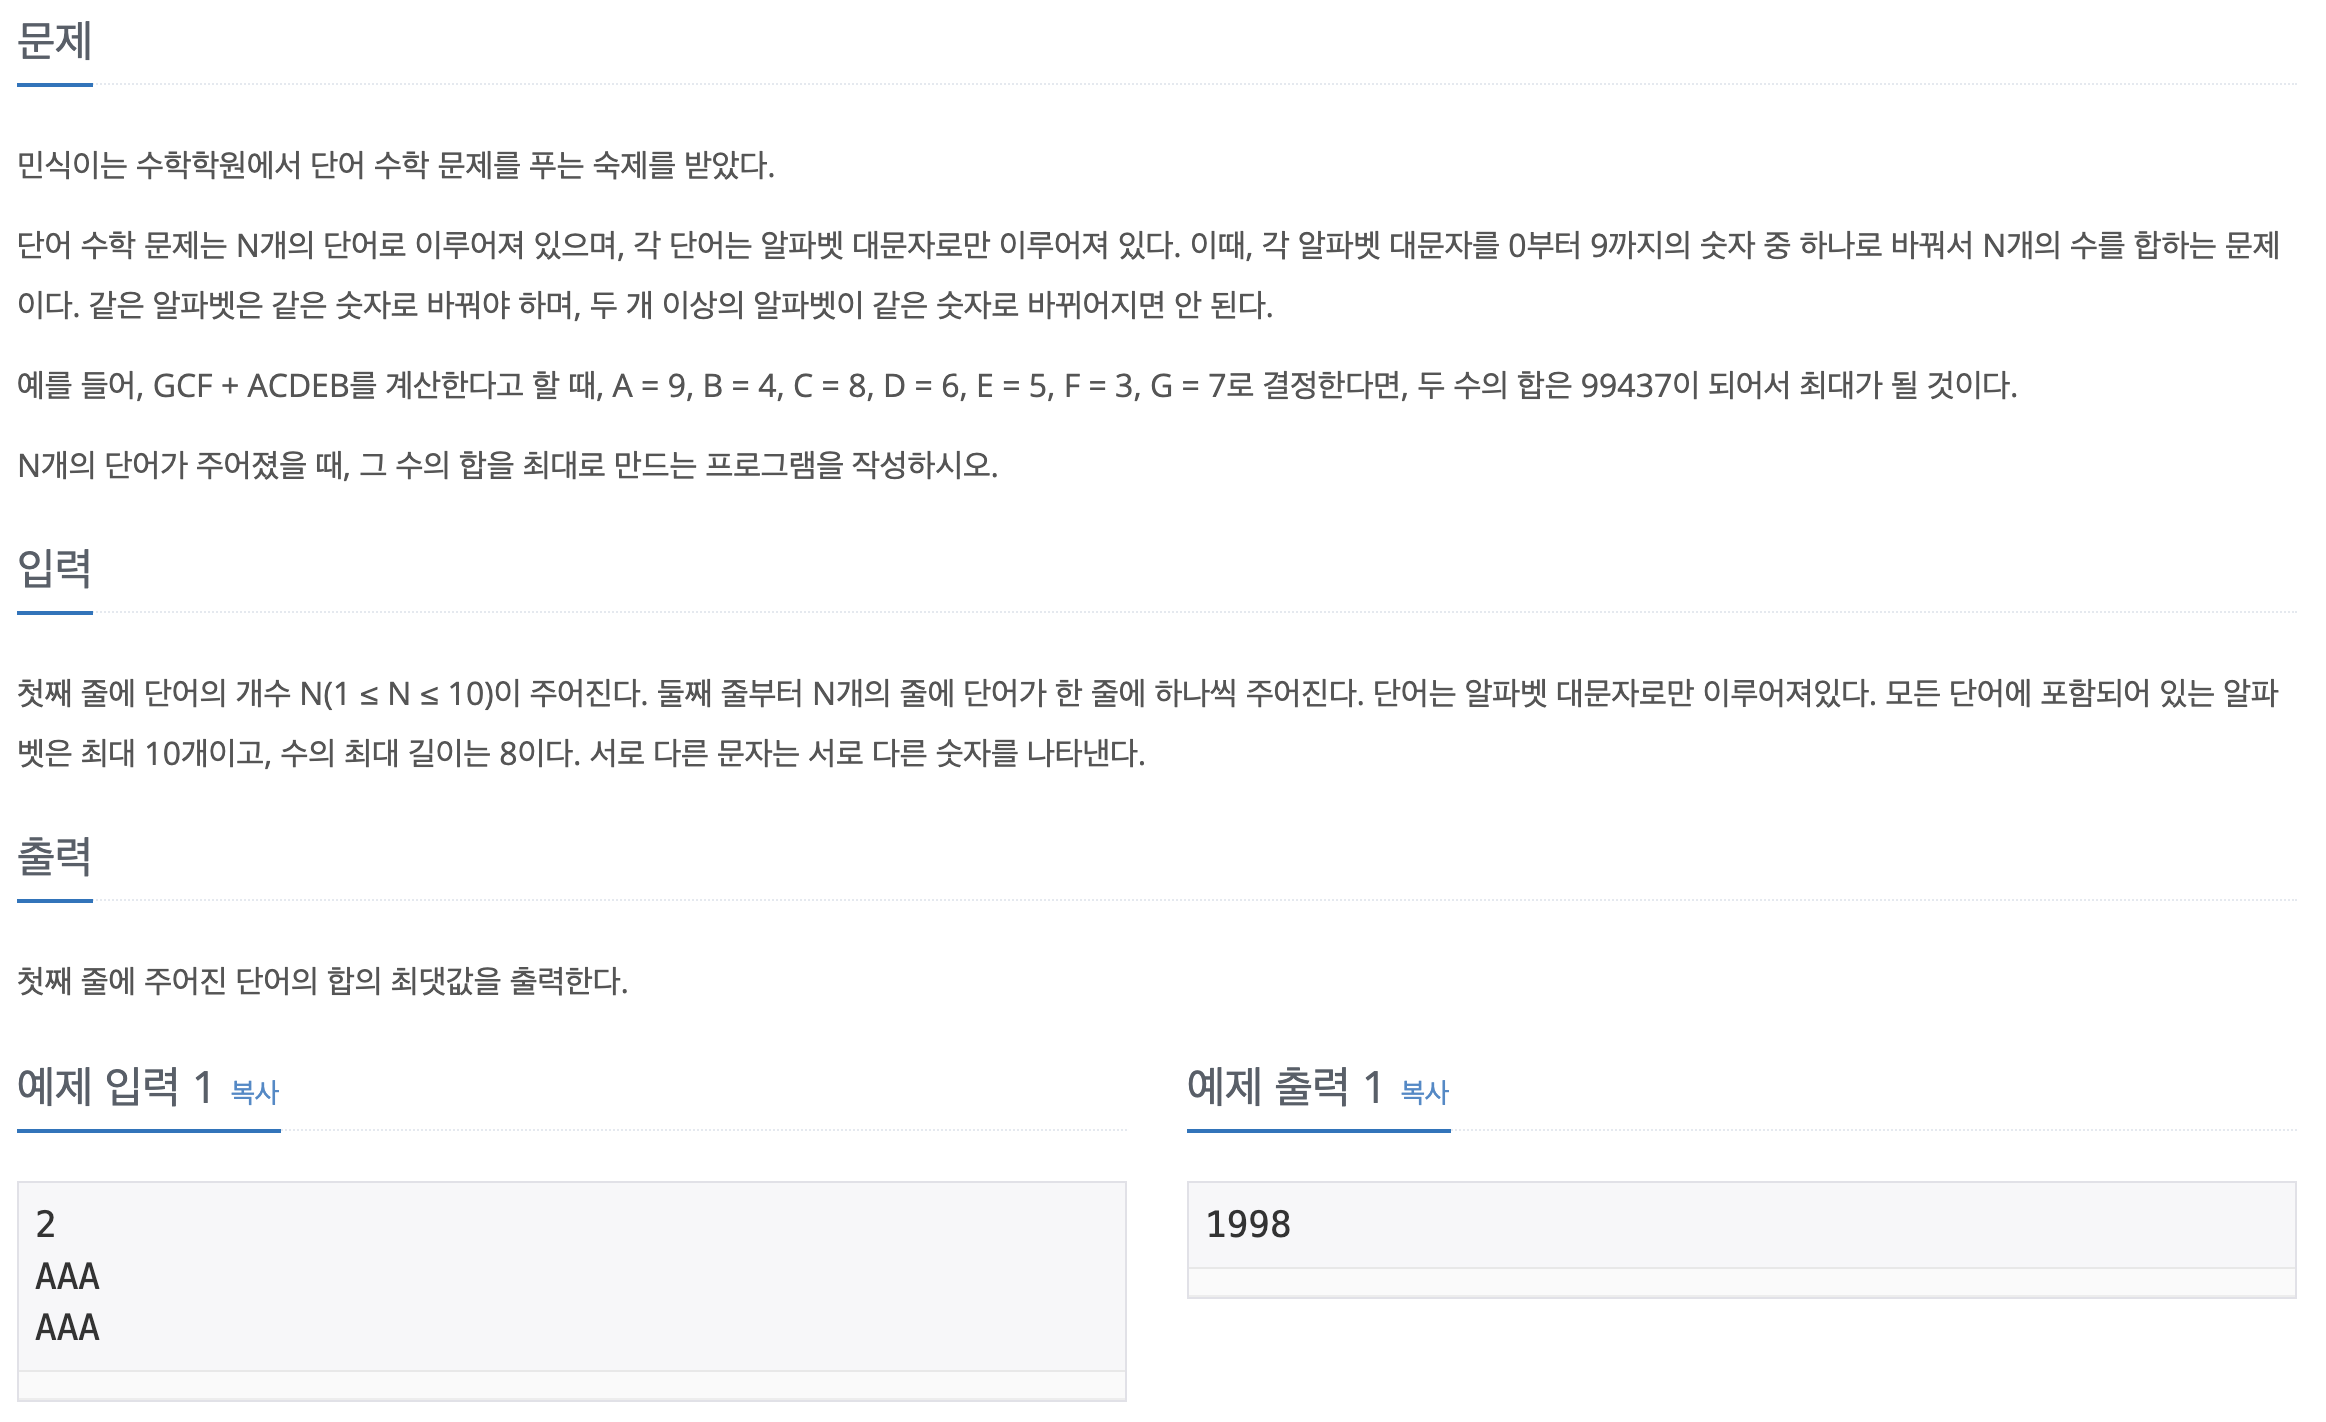

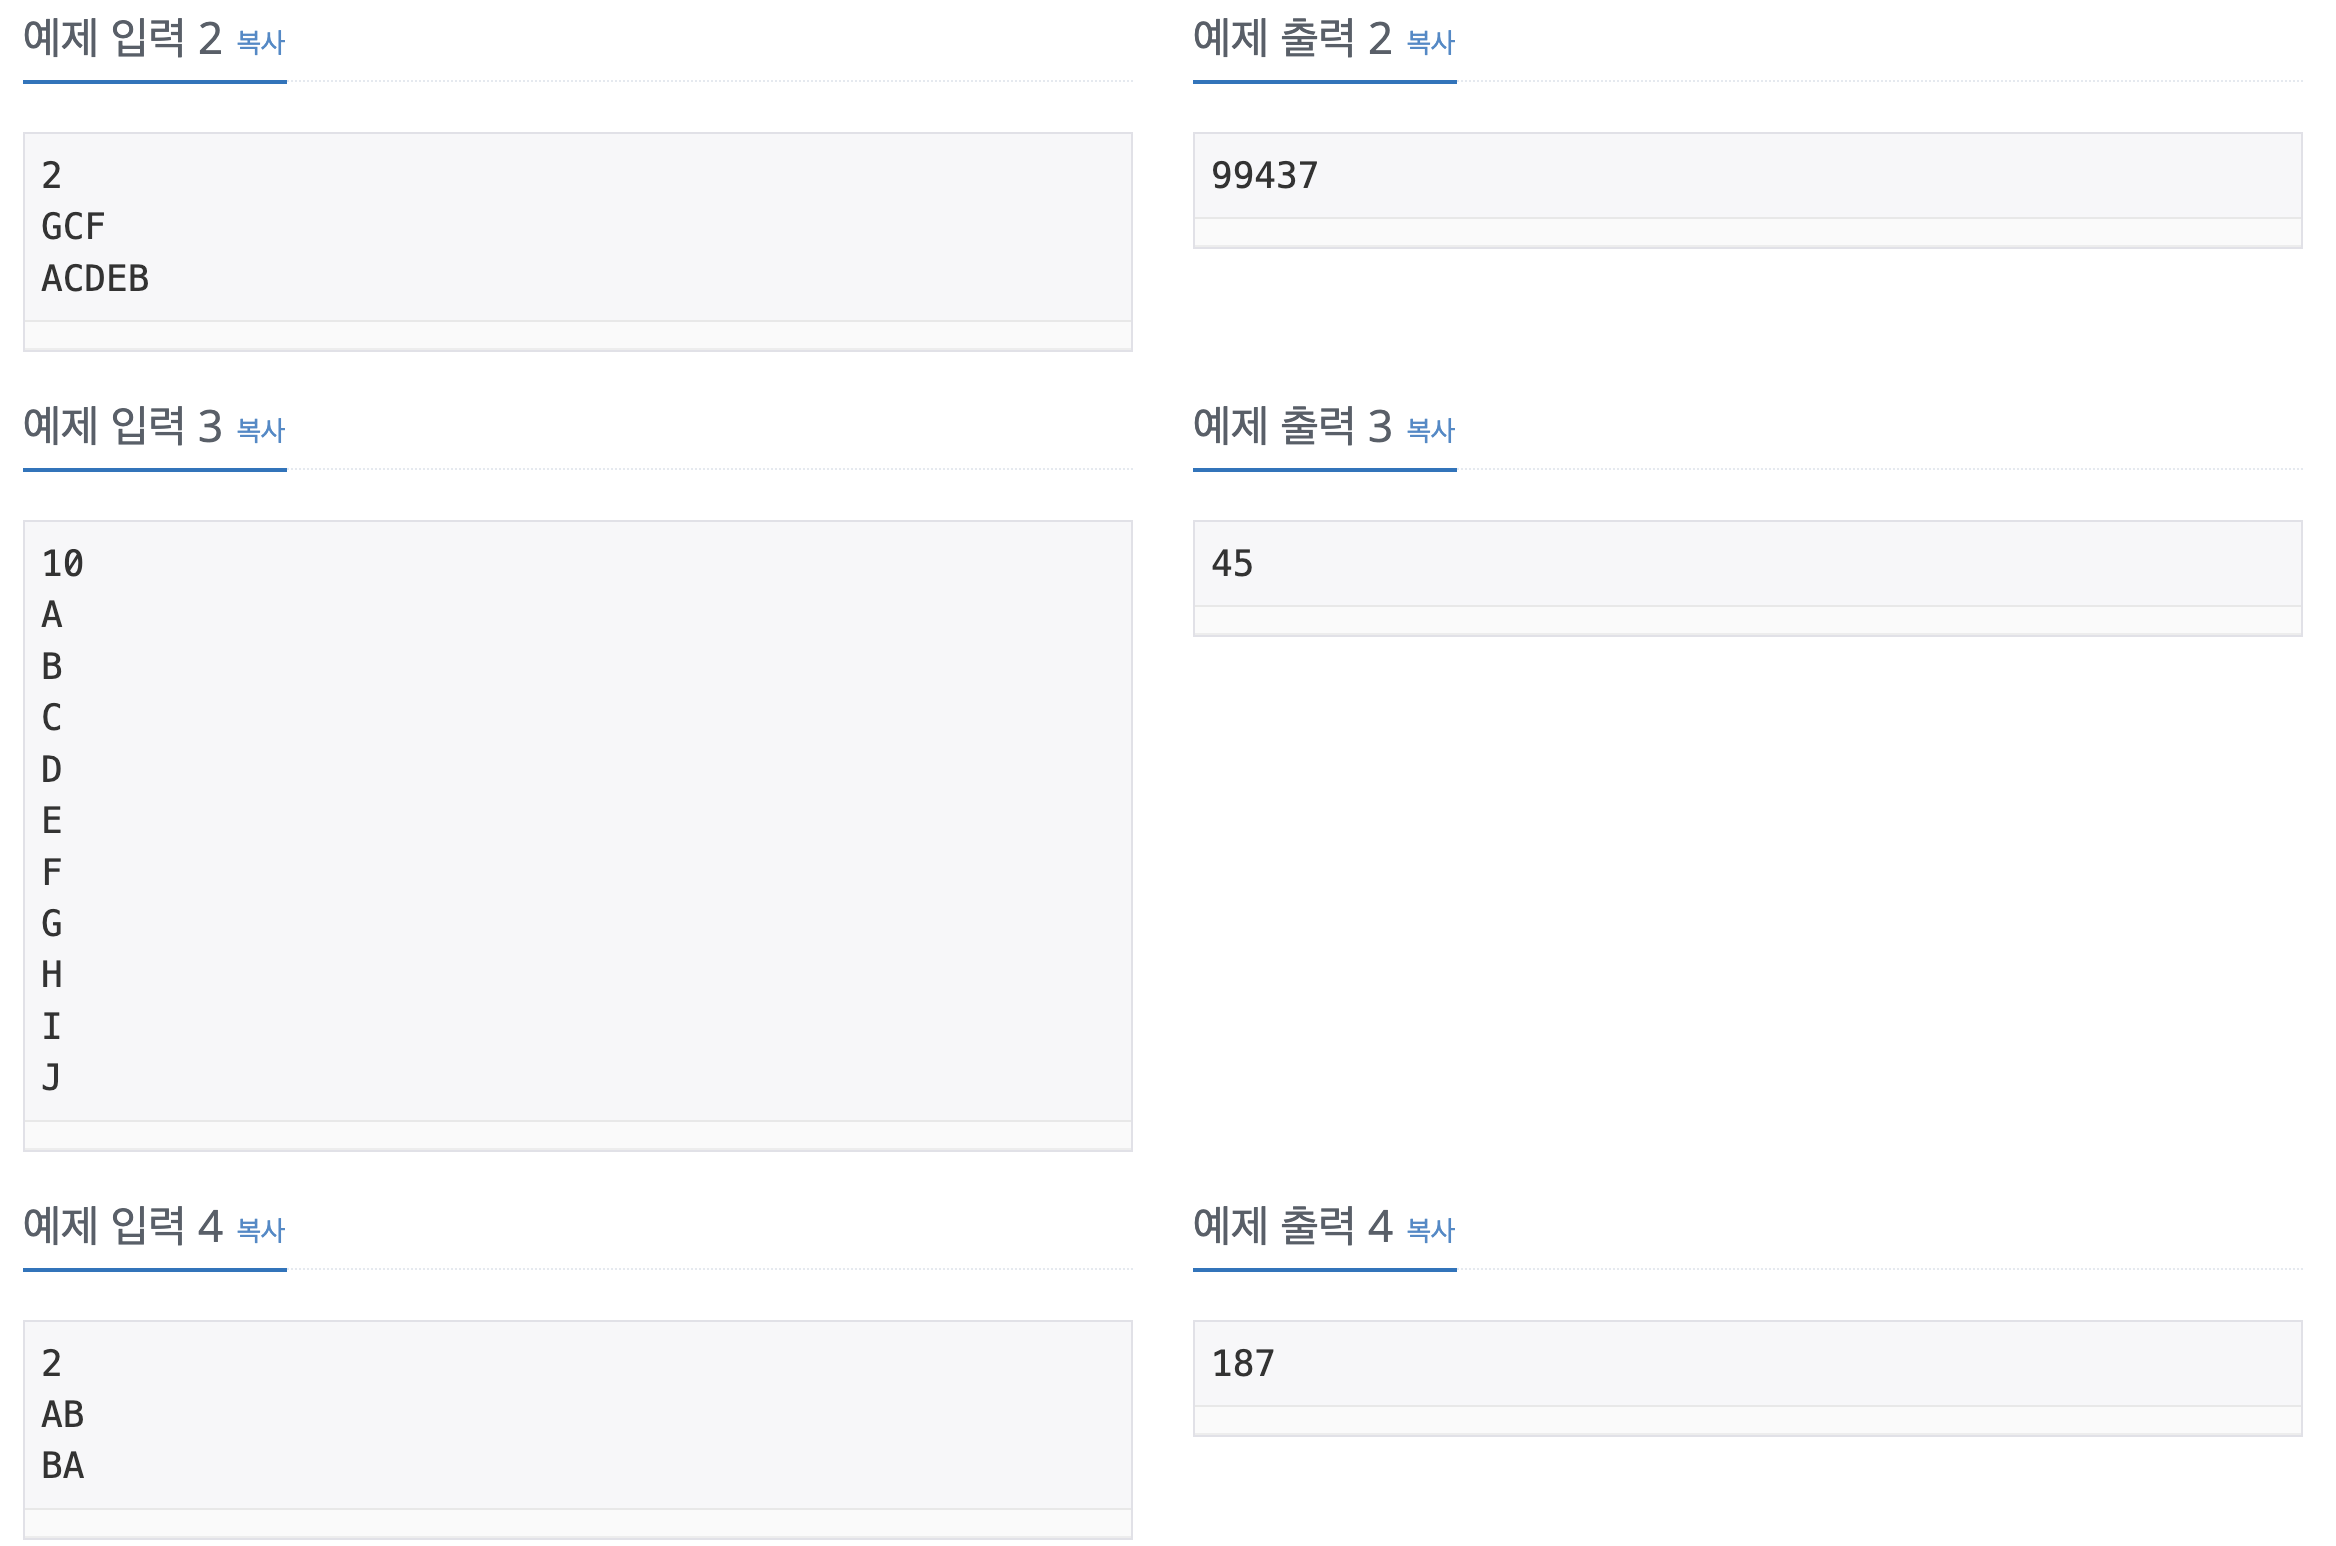

## Step
- 앞에 나오는 숫자부터 차례대로 9부터 하나씩 낮춰가며 배정한다
- 만약 알파벳에 이미 배정된 숫자가 있다면, 새로 배정할 숫자와 비교(이미 배정 됐기 때문에 새로 배정할 숫자 보다 클 것 이다)
- 앞에 나오는 알파벳부터 위치 인덱스를 이용하여 넣어주기 (어느 알파벳이 몇번째 자리에 나오는지)

### 첫 실패
- 같은 차수에 있다면, 알파벳의 총 등장 횟수가 큰 순서대로 큰 순서를 배정 해야 한다!
- 쫌 뻘짓하다가 해결,,,,

### 문자가 주어지면, 해당 문자가 몇 배수를 갖고 있는지 계산하자
- ex)
```
_ABC
__EA
DEFA
```
- A : 100 + 1 + 1
- B : 10
- C : 1
- D : 1000
- E : 100 + 10
- F : 10


- 그 후 큰 배수를 갖고 있는 문자 부터 9를 배정, 그 다음 문자는 8을 배정 ...
- 배정된 수와 갖고 있는 배수를 곱해 총 계산


In [272]:
import heapq

n = int(input())

# 알파벳 별 도합 차수(클 수록 나중에 같은 위치에서 높은 숫자를 배정 받아야 함)
apb_cnt = {}        
# 알파벳 별 가지고 있는 숫자
for x in range(65,91):
    apb_cnt[chr(x)] = 0

# 알파벳 리스트 만들기
apb_list = []
for _ in range(n):
    apb_list.append(input())

# 알파벳 별 도합 차수 계산하기
for apb in apb_list:
    for i in range(len(apb)):
        apb_cnt[apb[i]] += 10**(len(apb)-i-1)
        
heap = []
for k,v in apb_cnt.items():
    if v != 0:
        heap.append(-v)

heapq.heapify(heap)
ans = 0
num = 9
while heap:
    tmp = heapq.heappop(heap)
    ans += num*tmp*(-1)
    num -= 1
    
print(ans)

10
A
B
C
D
E
F
G
H
I
J
45


---
---
### test code

In [266]:
import heapq

n = int(input())
index = [[] for _ in range(11)]

# 알파벳 별 도합 차수(클 수록 나중에 같은 위치에서 높은 숫자를 배정 받아야 함)
apb_cnt = {}        
# 알파벳 별 가지고 있는 숫자
apb_dict = {}
for x in range(65,91):
    apb_dict[chr(x)] = 0
    apb_cnt[chr(x)] = 0

# 알파벳 리스트 만들기
apb_list = []
for _ in range(n):
    apb_list.append(input())

# 알파벳 별 도합 차수 계산하기
for apb in apb_list:
    for i in range(len(apb)):
        apb_cnt[apb[i]] += 10**(len(apb)-i-1)

# 알파벳의 위치 정보와 도합차수 정보 같이 넣기
for apb in apb_list:
    for i in range(len(apb)):    
        index[len(apb)-i].append((-apb_cnt[apb[i]],apb[i]))

3
ABC
EA
DEFA


In [247]:
import heapq

num = 9
for q in index[::-1]:
    heapq.heapify(q)
#     sorted(q, key = lambda x : x[1], reverse = True)
    while q:
        value,tmp = heapq.heappop(q)
#         print('value,tmp:',value,tmp)
#         print(q)
        if not tmp.isalpha():
#             heapq.heappush(q,(value,tmp))
#             print('flag1 : push number')
            break
        else:
            if apb_dict[tmp] < num:
                apb_dict[tmp] = num
                num -= 1
# #                 heapq.heappush(q,(value,str(apb_dict[tmp])))
#                 print('flag2 : dont change number')
#             else:
# #                 heapq.heappush(q,(value,str(num)))
#                 print('flag3 : change number')
                
#         print('-----------')
#     print('change q')

In [248]:
result = 0
for i in apb_dict.keys():
    result += apb_dict[i] * apb_cnt[i]
    
print(result)

99437


# 문제 2
- 연료 채우기
- https://www.acmicpc.net/problem/1826

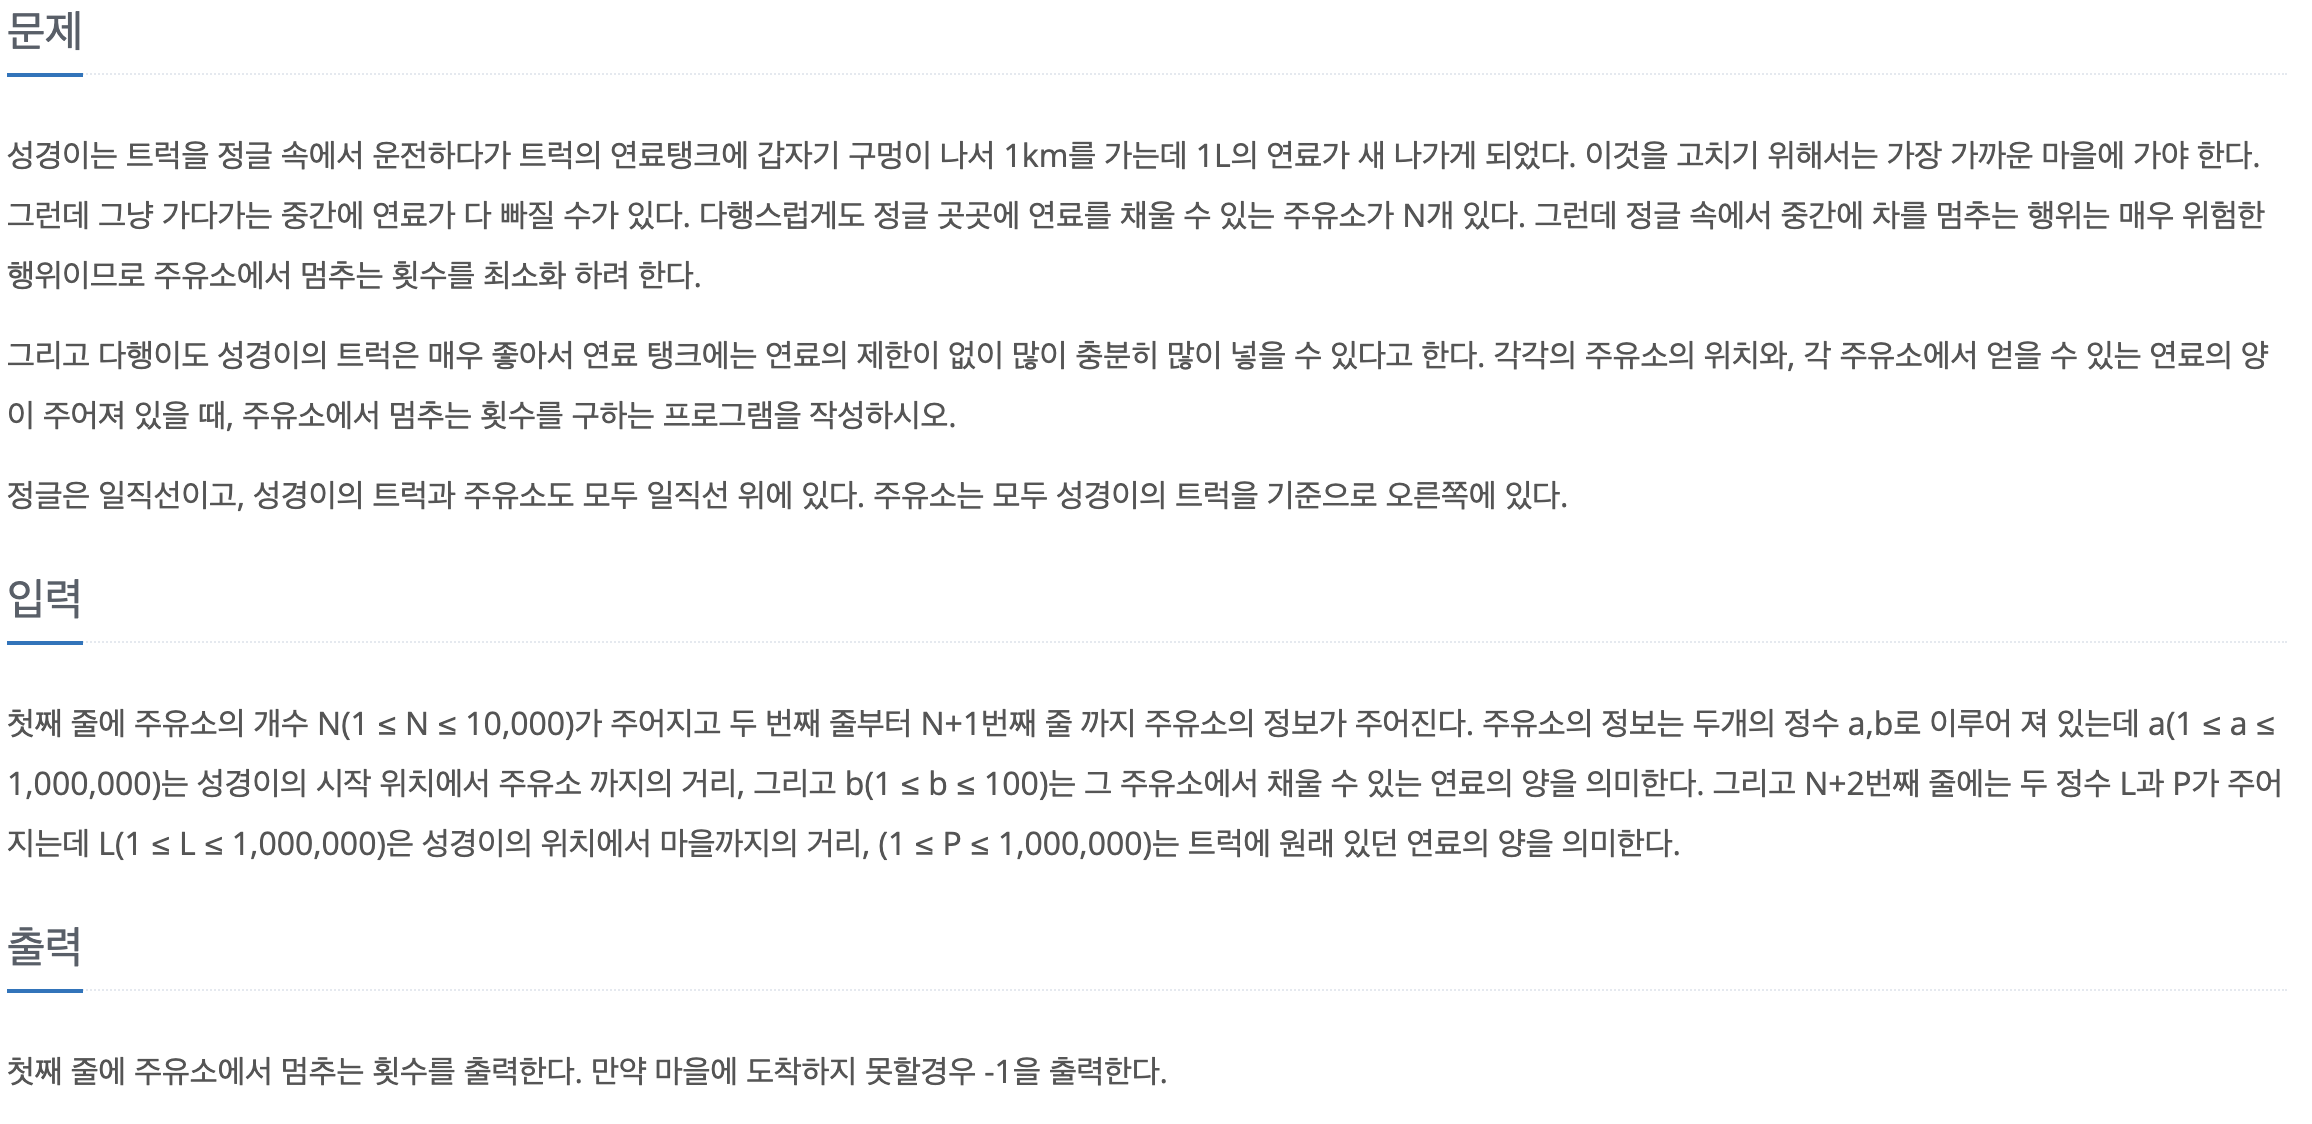
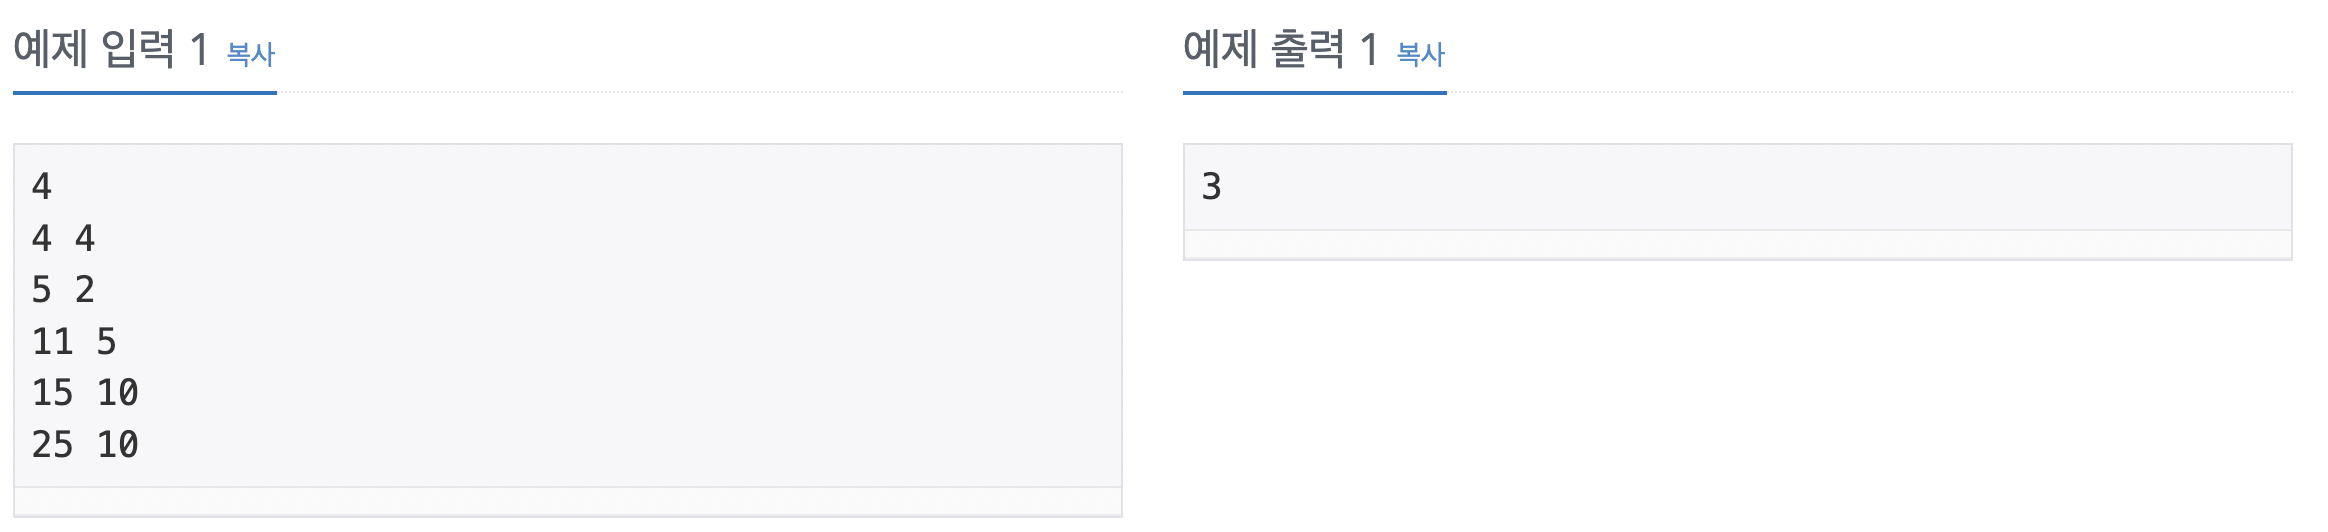

## Step
- 1. 갈 수 있는 곳 까지 간다
- 2. 내가 지나쳐 온 곳까지 있었던 주유소 중, 기름이 많이 있는 것 부터 먹는다
    - 만약 먹어도 다음 주유소 까지 못가면, 그 다음으로 많이 있던 기름을 먹는다
    - 만약 다음 주유소를 넘어갈 정도라면, 2번을 반복한다.
- 최종적으로 도달하면, 들른 주유소의 개수를 반환
- 도착 못하면 -1 출력

-https://lcyking.tistory.com/14

In [9]:
import heapq

n = int(input())
oil_station = []
for _ in range(n):
    x, oil = map(int,input().split())
    oil_station.append((x,oil))
    
goal, now = map(int,input().split()) 
oil_station.append((goal,0))  # 최종 목적지 좌표 입력
oil_station.sort()

heap = []
cnt = 0
for x, oil in oil_station:
    if now < x:  # 기름이 부족한 상태 (기름을 넣어야 함)
        while heap:
            tmp_oil = heapq.heappop(heap)
            now += -tmp_oil
            cnt += 1
            if now >= x:
                break
    
    if not heap and now < x:  # 기름도 부족한데, 기름 넣을 주유소 조차 힙에 없다면 도착을 못한다
        cnt = -1
        break
    else:                     # 주유소를 지나갈 수 있다면 주유소의 기름 정보 킵
        heapq.heappush(heap, -oil)

print(cnt)

4
4 4
5 2
11 5
15 10
25 10
3


In [12]:
oil_station

[(4, 4), (5, 2), (11, 5), (15, 10), (25, 0)]

# 문제 3
- 과제
-https://www.acmicpc.net/problem/13904

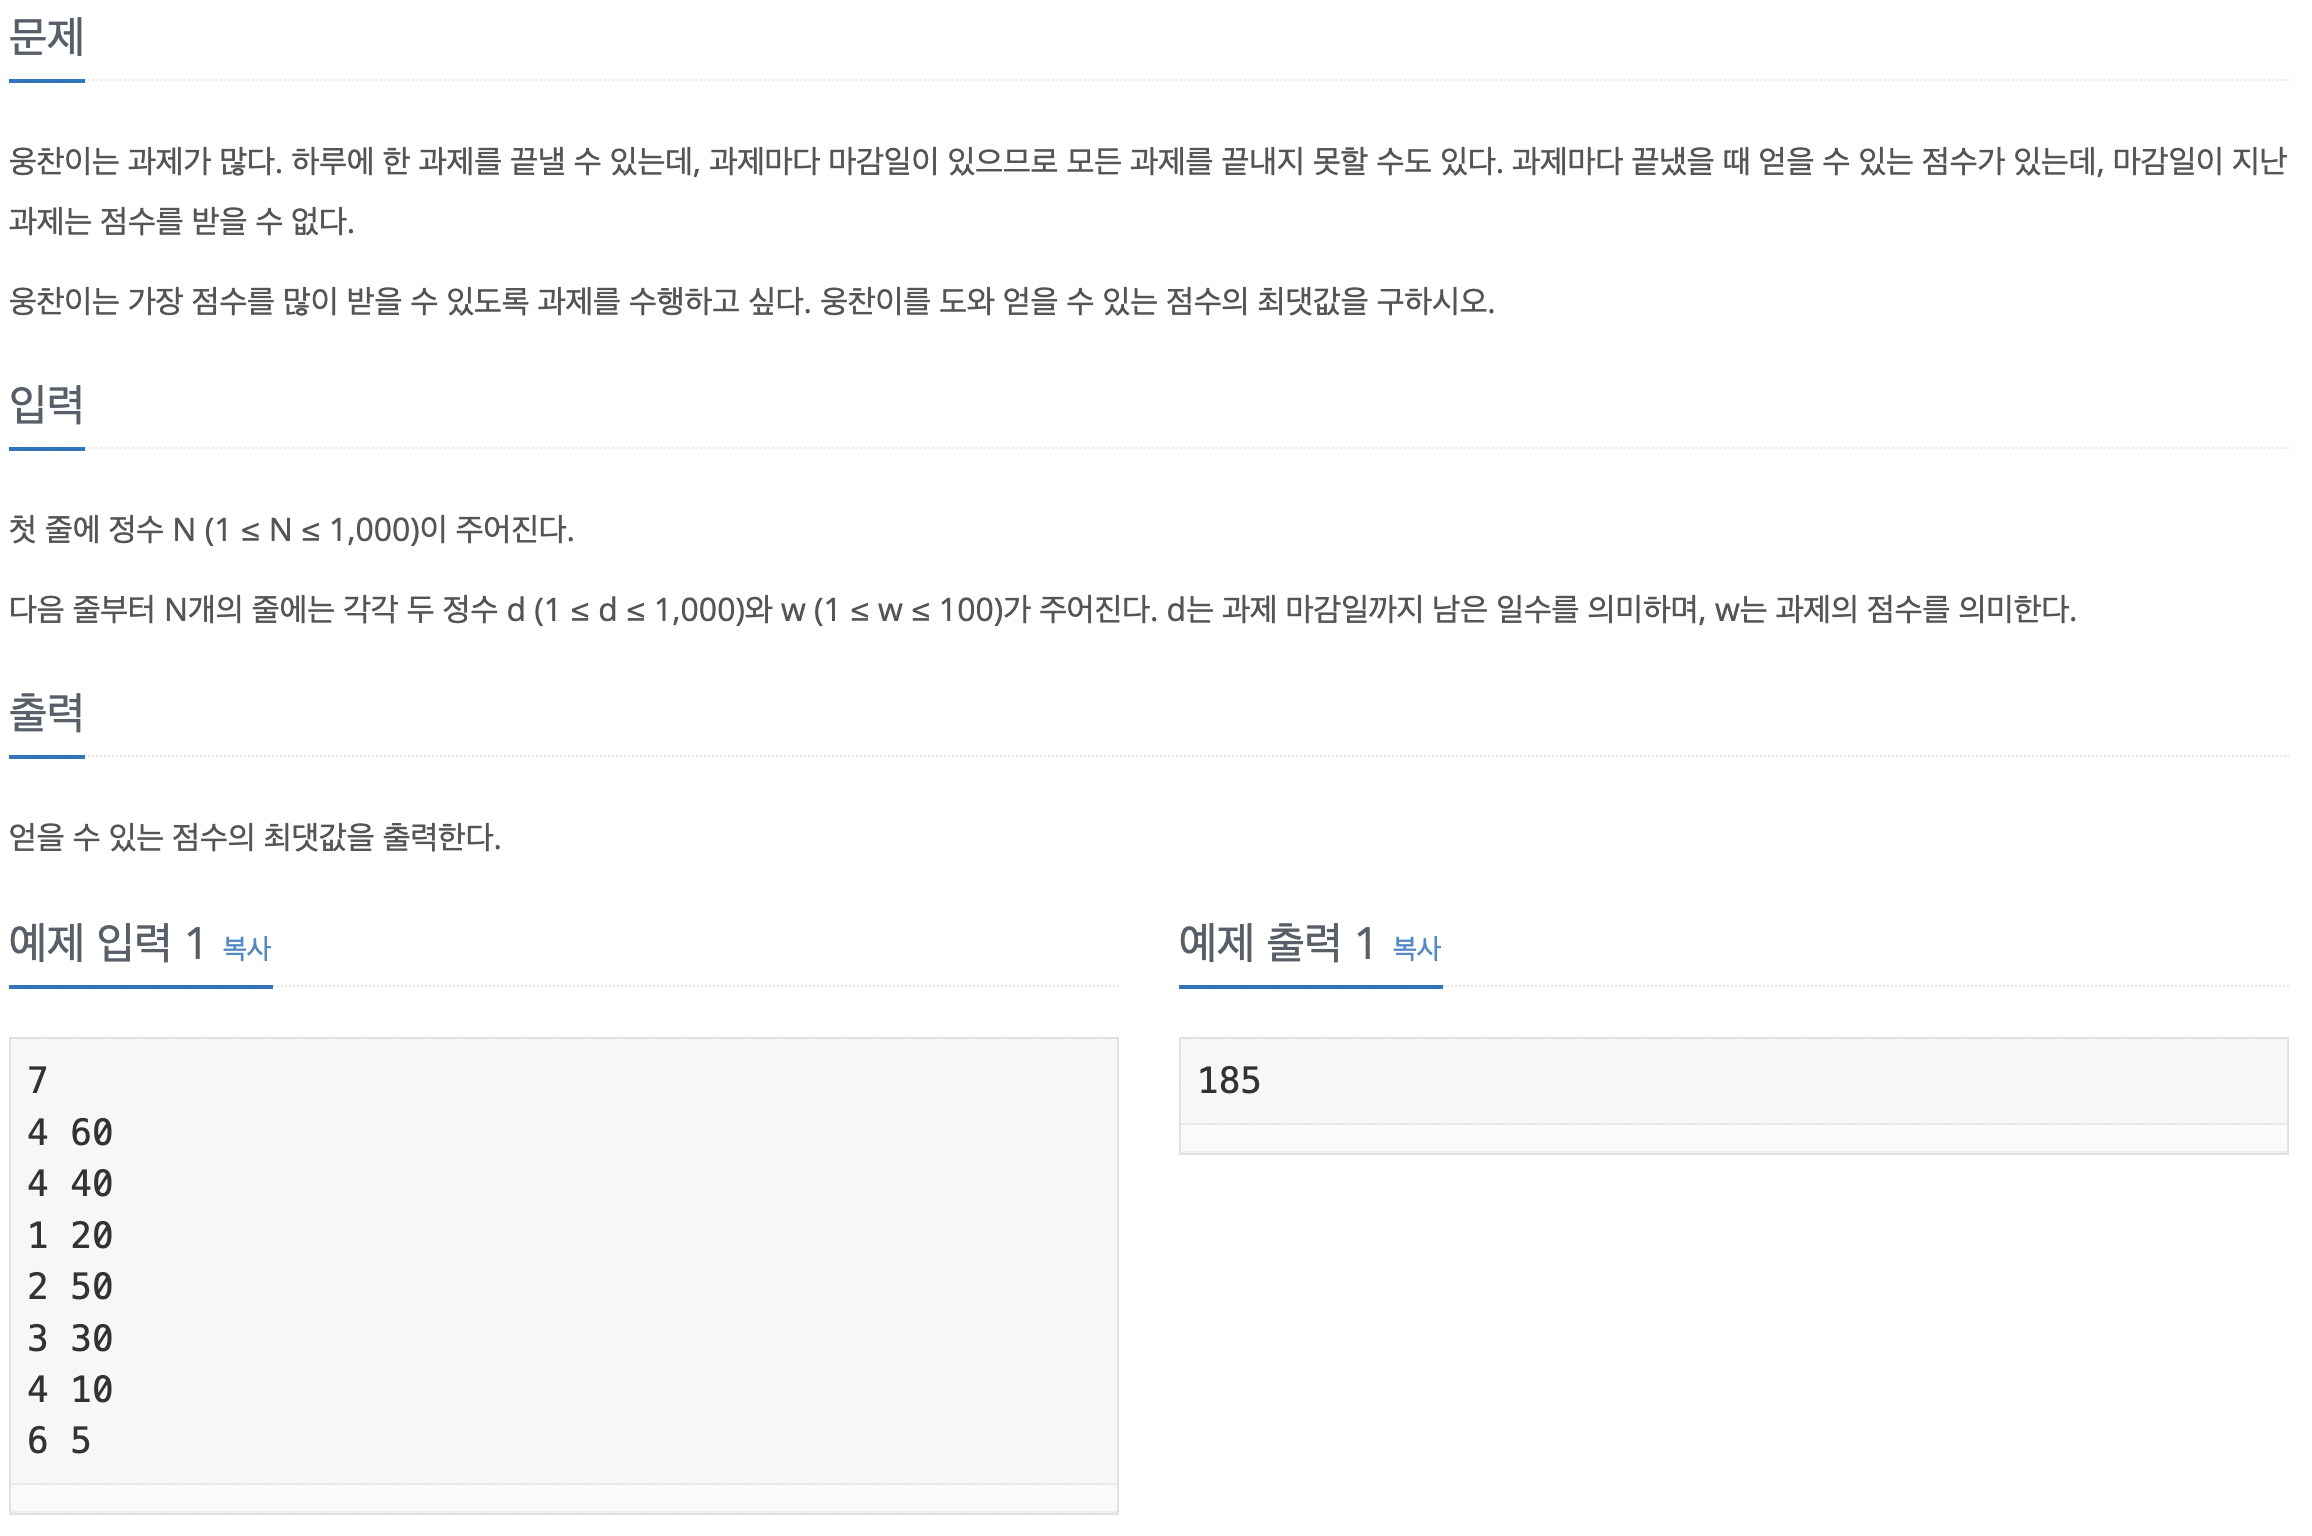

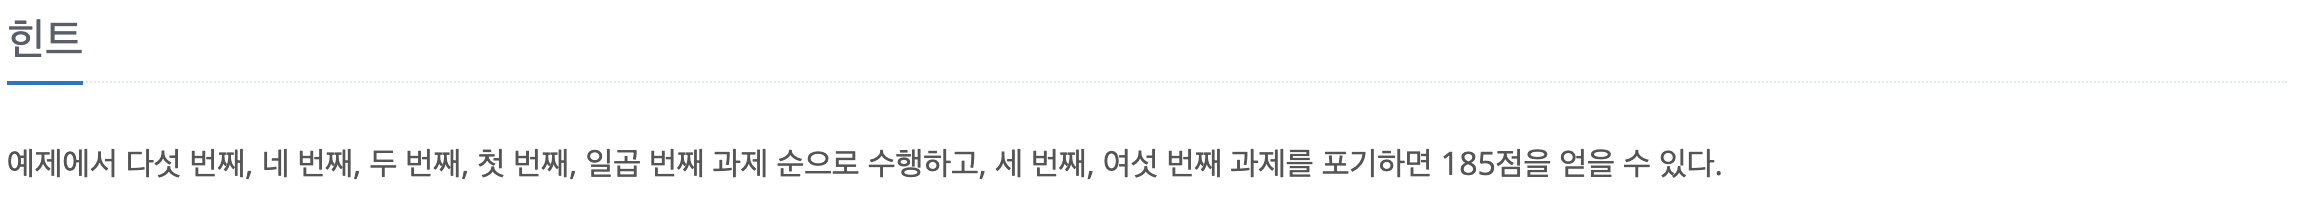

## Step
- 1일차에 할 수 있는 과제 : 20,50,30,10,40,60,5
- 2일차에 할 수 있는 과제 : 50,30,10,40,60,5
- 3일차에 할 수 있는 과제 : 30,10,40,60,5
- 4일차에 할 수 있는 과제 : 10,40,60,5
- 5일차에 할 수 있는 과제 : 5


- 할 수 있는 과제를 마감일에 가까운 날 부터(뒤에서 부터) 채우면서한다. (가장 큰 과제를 수행)
- 5일차에는 5 (6일)
- 4일차에는 60(4일)
- 3일차에는 40(4일)
- 2일차에는 50(2일)
- 1일차에는 30(3일)

In [65]:
n = int(input())
hw = []
do = [0]*(n+1)  # 각 날짜마다 얻을 수 있는 과제점수
for _ in range(n):
    day, work = map(int, input().split())
    hw.append([day,work])
    
hw.sort(key = lambda x : x[1], reverse = True)

do = [0]*(n+1)
visit = [0] * len(hw)
for i in range(len(do)-1,0,-1):  # 마감일에 가까운 날부터 차례로 할 수 있는 숙제 채우기
    for j, each in enumerate(hw):
        day,work = each[0],each[1]
        if day >= i and visit[j] == 0:  # 만약 마감일까지 남은날 >= 현재 날짜라면, 숙제를 넣어라(이 때 큰 값 부터 정렬 되어 있으므로 넣고 break)
            do[i] = work
            visit[j] = 1
            break
            
print(sum(do))

7
4 60
4 40
1 20
2 50
3 30
4 10
6 5
185


In [60]:
visit

[1, 1, 1, 1, 0, 0, 1]

In [61]:
do

[0, 30, 50, 40, 60, 0, 5, 0]

In [62]:
sum(do)

185